# 서울시 공공자전거 2022년 12월 이용현황 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
pd.options.display.float_format = '{:,.2f}'.format

bike_time = pd.read_csv('seoul_bike_time_2212.csv', encoding='cp949')

bike_time.rename(columns={"이동거리(M)":"이동거리"}, inplace=True)
bike_time.rename(columns={"이용시간(분)":"이용시간"}, inplace=True)

#  이용시간==0, 이동거리==0, 이용건수>1, 연령대코드==기타, 성별=NaN, 대여구분코드=단체권, 일일권(비회원)  제외
bike = bike_time.dropna()
bike_del = bike[(bike["이용시간"]==0)|(bike["이동거리"]==0)|(bike["이용건수"]>1)|(bike["연령대코드"]=="기타")
            |((bike["대여구분코드"]=="단체권")|(bike["대여구분코드"]=="일일권(비회원)"))].index
bike=bike.drop(bike_del)
bike

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638949,2022-12-31,23,1011,1011. LIGA 아파트 앞,정기권,M,50대,1,59.49,0.42,"1,810.00",58
1638950,2022-12-31,23,1529,1529. 미아동 한국전력공사,정기권,M,60대,1,78.85,0.71,"3,063.50",27
1638951,2022-12-31,23,3571,3571.화양 APT(횡단보도 옆),정기권,M,60대,1,25.10,0.22,932.05,6
1638952,2022-12-31,23,534,534. 금호사거리,정기권,M,60대,1,36.75,0.27,"1,160.00",8


#### 이상치제거 IQR

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638949,2022-12-31,23,1011,1011. LIGA 아파트 앞,정기권,M,50대,1,59.49,0.42,"1,810.00",58
1638950,2022-12-31,23,1529,1529. 미아동 한국전력공사,정기권,M,60대,1,78.85,0.71,"3,063.50",27
1638951,2022-12-31,23,3571,3571.화양 APT(횡단보도 옆),정기권,M,60대,1,25.10,0.22,932.05,6
1638952,2022-12-31,23,534,534. 금호사거리,정기권,M,60대,1,36.75,0.27,"1,160.00",8


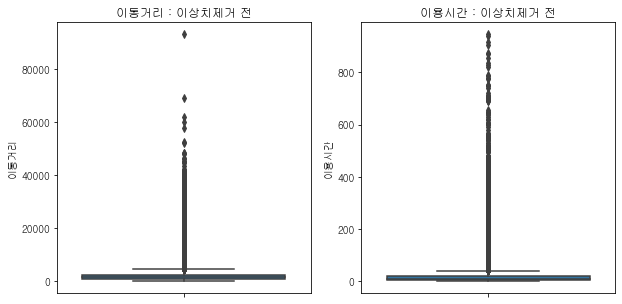

In [2]:
# 이상치제거 전
fig = plt.figure(figsize=(10,5))
title1 = fig.add_subplot(1,2,1)
title1.set_title('이동거리 : 이상치제거 전')

title2 = fig.add_subplot(1,2,2)
title2.set_title('이용시간 : 이상치제거 전')

sns.boxplot(data=bike, y="이동거리", ax = title1)
sns.boxplot(data=bike, y="이용시간", ax = title2)
bike

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638945,2022-12-31,23,576,576. 광나루역 3번 출구,정기권,M,50대,1,35.59,0.25,"1,070.00",7
1638947,2022-12-31,23,638,638. 서울시립대 정보기술관,정기권,M,50대,1,20.24,0.16,700.00,3
1638950,2022-12-31,23,1529,1529. 미아동 한국전력공사,정기권,M,60대,1,78.85,0.71,"3,063.50",27
1638951,2022-12-31,23,3571,3571.화양 APT(횡단보도 옆),정기권,M,60대,1,25.10,0.22,932.05,6


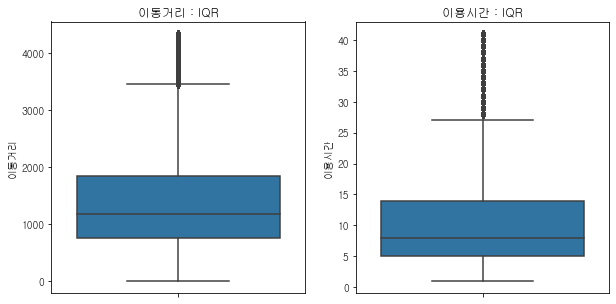

In [3]:
# 운동량 iqr 값
q3 = bike["이동거리"].quantile(0.75)
q1 = bike["이동거리"].quantile(0.25)
iqr = q3 - q1
outlier_top = q3 + 1.5 * iqr
outlier_bottom = q1 - 1.5 * iqr

# 이용시간 iqr 값
q3_time = bike["이용시간"].quantile(0.75)
q1_time = bike["이용시간"].quantile(0.25)
iqr_time = q3_time - q1_time
outlier_top_time = q3_time + 1.5 * iqr_time
outlier_bottom_time = q1_time - 1.5 * iqr_time

idx = bike[(bike["이동거리"]<outlier_bottom)|(bike["이동거리"]>outlier_top)|
           (bike["이용시간"]<outlier_bottom_time)|(bike["이용시간"]>outlier_top_time)].index
bike = bike.drop(idx)

# iqr 확인

fig = plt.figure(figsize=(10,5))
title1 = fig.add_subplot(1,2,1)
title1.set_title('이동거리 : IQR')

title2 = fig.add_subplot(1,2,2)
title2.set_title('이용시간 : IQR')

sns.boxplot(data=bike, y="이동거리", ax = title1)
sns.boxplot(data=bike, y="이용시간", ax = title2)

bike

######### Z-Score 주석처리

# idx = bike[((abs((bike["이용시간"]-np.mean(bike["이용시간"]))/np.std(bike["이용시간"])))> 1.96)
#            |((abs((bike["이동거리"]-np.mean(bike["이동거리"]))/np.std(bike["이동거리"])))> 1.96)].index
# bike = bike.drop(idx)


# # 확인

# fig = plt.figure(figsize=(10,5))
# title1 = fig.add_subplot(1,2,1)
# title1.set_title('이동거리')

# title2 = fig.add_subplot(1,2,2)
# title2.set_title('이용시간')

# sns.boxplot(data=bike, y="이동거리", ax = title1)
# sns.boxplot(data=bike, y="이용시간", ax = title2)

In [4]:
bike

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638945,2022-12-31,23,576,576. 광나루역 3번 출구,정기권,M,50대,1,35.59,0.25,"1,070.00",7
1638947,2022-12-31,23,638,638. 서울시립대 정보기술관,정기권,M,50대,1,20.24,0.16,700.00,3
1638950,2022-12-31,23,1529,1529. 미아동 한국전력공사,정기권,M,60대,1,78.85,0.71,"3,063.50",27
1638951,2022-12-31,23,3571,3571.화양 APT(횡단보도 옆),정기권,M,60대,1,25.10,0.22,932.05,6


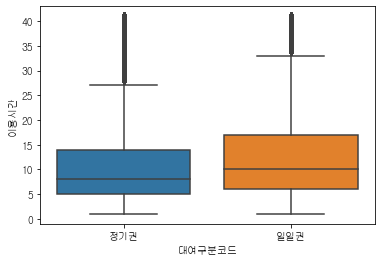

In [5]:
sns.boxplot(data=bike, x="대여구분코드", y="이용시간")

### 연령대별 이용현황
#### 시간대별 대여 현황

In [6]:
bike10 = bike[bike["연령대코드"]=="~10대"]
bike20 = bike[bike["연령대코드"]=="20대"]
bike30 = bike[bike["연령대코드"]=="30대"]
bike40 = bike[bike["연령대코드"]=="40대"]
bike50 = bike[bike["연령대코드"]=="50대"]
bike60 = bike[bike["연령대코드"]=="60대"]
bike70 = bike[bike["연령대코드"]=="70대이상"]

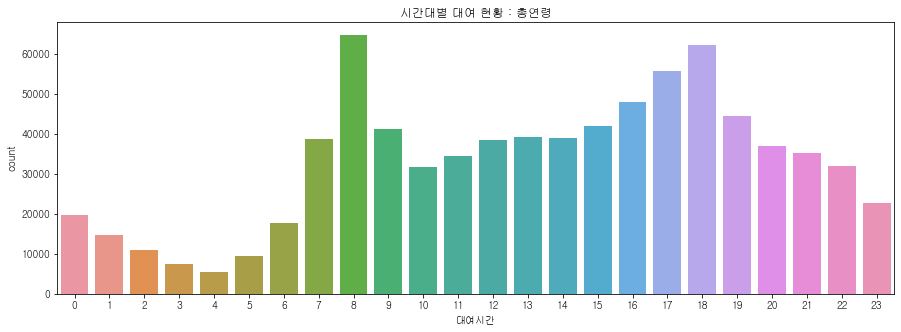

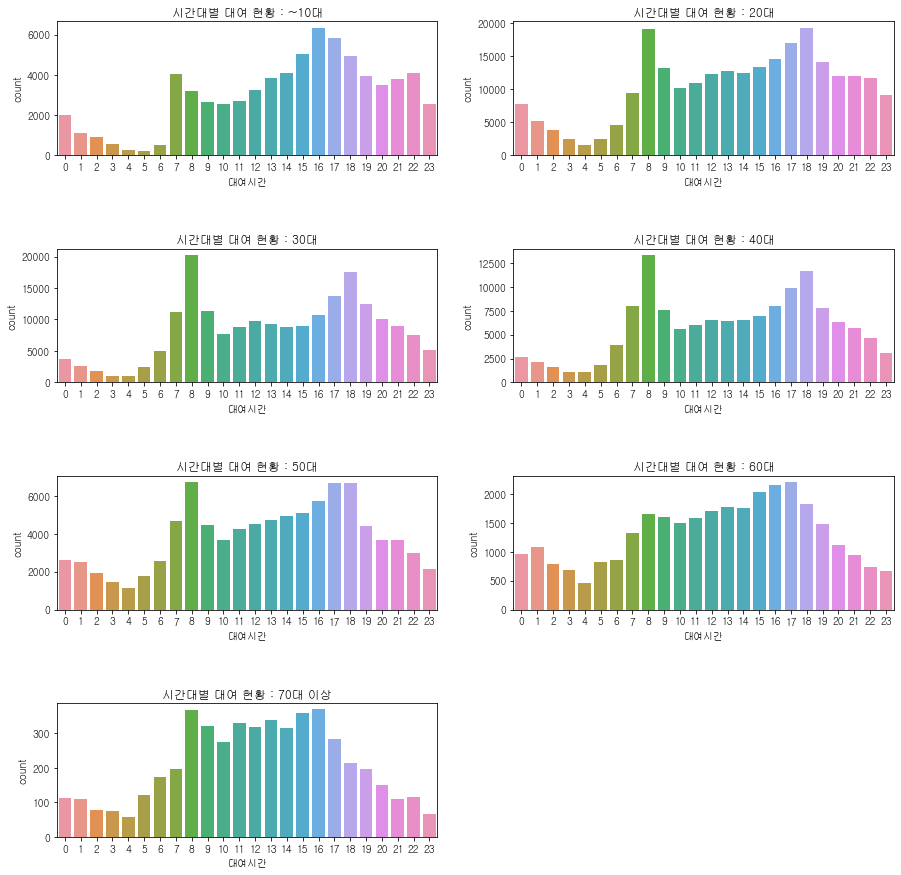

In [7]:
fig = plt.figure(figsize=(15,5))
num_all = fig.add_subplot(1,1,1)
num_all.set_title('시간대별 대여 현황 : 총연령')

sns.countplot(x = '대여시간', data = bike, ax = num_all)


fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.7)

num10 = fig.add_subplot(4,2,1)
num10.set_title('시간대별 대여 현황 : ~10대')
num20 = fig.add_subplot(4,2,2)
num20.set_title('시간대별 대여 현황 : 20대')
num30 = fig.add_subplot(4,2,3)
num30.set_title('시간대별 대여 현황 : 30대')
num40 = fig.add_subplot(4,2,4)
num40.set_title('시간대별 대여 현황 : 40대')
num50 = fig.add_subplot(4,2,5)
num50.set_title('시간대별 대여 현황 : 50대')
num60 = fig.add_subplot(4,2,6)
num60.set_title('시간대별 대여 현황 : 60대')
num70 = fig.add_subplot(4,2,7)
num70.set_title('시간대별 대여 현황 : 70대 이상')


sns.countplot(x = '대여시간', data = bike10, ax = num10)
sns.countplot(x = '대여시간', data = bike20, ax = num20)
sns.countplot(x = '대여시간', data = bike30, ax = num30)
sns.countplot(x = '대여시간', data = bike40, ax = num40)
sns.countplot(x = '대여시간', data = bike50, ax = num50)
sns.countplot(x = '대여시간', data = bike60, ax = num60)
sns.countplot(x = '대여시간', data = bike70, ax = num70)

In [8]:
# 러시아워 7~9, 17~20
rush_hour_day = bike[(bike["대여시간"]>=7)&(bike["대여시간"]<=9)]
rush_hour_night = bike[(bike["대여시간"]>=17)&(bike["대여시간"]<=20)]
rush_hour = bike[((bike["대여시간"]>=7)&(bike["대여시간"]<=9))|((bike["대여시간"]>=17)&(bike["대여시간"]<=20))]
non_rush_hour = bike.drop(rush_hour.index)

non_rush_hour

##### 각 시각화 라인플롯으로 변경, 러쉬아워 추가

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638945,2022-12-31,23,576,576. 광나루역 3번 출구,정기권,M,50대,1,35.59,0.25,"1,070.00",7
1638947,2022-12-31,23,638,638. 서울시립대 정보기술관,정기권,M,50대,1,20.24,0.16,700.00,3
1638950,2022-12-31,23,1529,1529. 미아동 한국전력공사,정기권,M,60대,1,78.85,0.71,"3,063.50",27
1638951,2022-12-31,23,3571,3571.화양 APT(횡단보도 옆),정기권,M,60대,1,25.10,0.22,932.05,6
